# Funciones de distribución de probabilidades

## Distribución Uniforme

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
a = 1
b = 100
n = 2000000
data = np.random.uniform(a,b,n)

(array([199877., 199549., 199726., 200156., 199552., 200163., 200493.,
        200239., 200570., 199675.]),
 array([ 1.00008457, 10.90006204, 20.80003951, 30.70001699, 40.59999446,
        50.49997193, 60.3999494 , 70.29992687, 80.19990434, 90.09988181,
        99.99985928]),
 <a list of 10 Patch objects>)

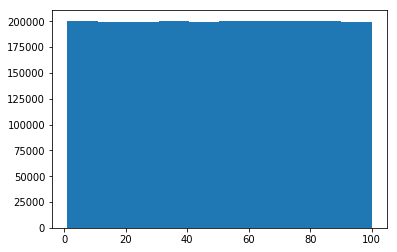

In [3]:
%matplotlib inline
plt.hist(data)

## Distribución Normal

In [4]:
data = np.random.randn(1000000)

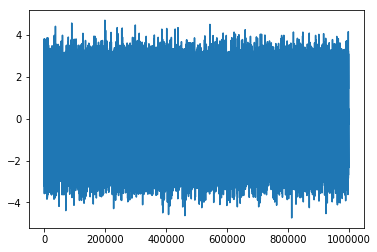

In [5]:
x = range(1,1000001)
plt.plot(x, data)

(array([7.70000e+01, 2.10700e+03, 2.59340e+04, 1.39637e+05, 3.25120e+05,
        3.29649e+05, 1.46899e+05, 2.82210e+04, 2.26700e+03, 8.90000e+01]),
 array([-4.7413175 , -3.79674   , -2.85216251, -1.90758501, -0.96300751,
        -0.01843002,  0.92614748,  1.87072497,  2.81530247,  3.75987997,
         4.70445746]),
 <a list of 10 Patch objects>)

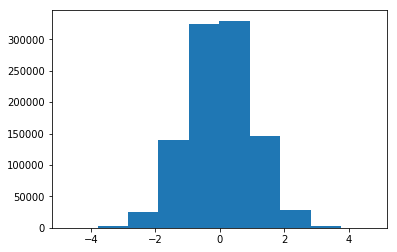

In [6]:
plt.hist(data)

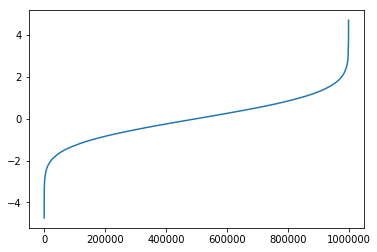

In [7]:
plt.plot(x, sorted(data))

(array([   3.,   50.,  338., 1182., 2457., 2987., 2040.,  742.,  183.,
          18.]),
 array([-4.60205872, -2.69755409, -0.79304946,  1.11145517,  3.0159598 ,
         4.92046443,  6.82496905,  8.72947368, 10.63397831, 12.53848294,
        14.44298757]),
 <a list of 10 Patch objects>)

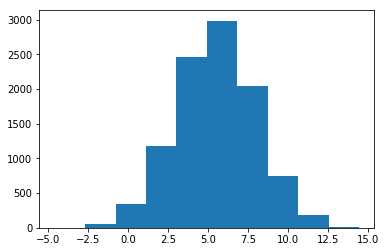

In [8]:
mu = 5.5
sd = 2.5
Z = np.random.randn(10000)
data = mu + sd*Z # z = (x - mu) /sd  -> N(0,1), X = mu + sd(Teorema central del limite, 
# Tipificar hecho de convertr cualquier variable aleatoria en una normal estandar)
plt.hist(data)

In [9]:
data = np.random.randn(2,4)
data

array([[ 0.05986125,  1.51412329, -0.77290384,  0.60260148],
       [-0.10948785, -1.18565384, -0.70030385, -0.12754405]])

## La simulación de Monte Carlo

* Generar dos números aleatorios uniforme x e y entre 0 y 1
* Calcularemos x^2 + y^2
    * Si el valor es inferior a 1 -> estamos dentro del círculo
    * Si el valor es superior a 1 -> estamos fuera del circulo
* Calculamos el número total de veces que están dentro del círculo y lo dividimos entre el número total de intentos para obtener una aproximación de la probabilidad de caer dentro del círculo.
* Usamos dicha probabildiad para aproximar el valor de pi.
* Repetimos el experimiento un número suficiente de veces (por ejemplo 1000), para obtener diferentes aproximaciones de pi.
* Calculamos el promedio de los 1000 experimentos para dar un valor final de pi.

In [5]:
def pi_montecarlo(times, num_exps):
    pi_avg = 0
    pi_value_list = []

    for i in range(num_exps):
        value = 0
        x = np.random.uniform(0,1,times).tolist()
        y = np.random.uniform(0,1,times).tolist()
        for j in range(times):
            z = np.sqrt(x[j] * x[j] + y[j] * y[j])
            if z <=1:
                value += 1
        pi_value = float(value) * 4 / num_exps 
        pi_value_list.append(pi_value)
        pi_avg += pi_value

    pi = pi_avg / times

    print(pi)
    fig = plt.plot(sorted(pi_value_list))
    return (pi, fig)

3.1428059999999944


(3.1428059999999944, [<matplotlib.lines.Line2D at 0x1ff01d4d898>])

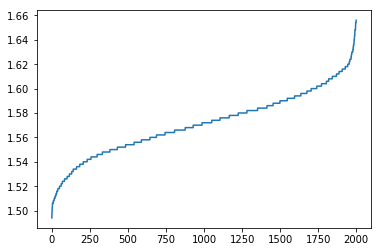

In [16]:
pi_montecarlo(1000, 2000)

## Dummy Data Sets

In [43]:
n = 20000
data = pd.DataFrame(
    {
        'A' : np.random.randn(n),
        'B' : 1.5 + 2.5*np.random.randn(n),
        'C' : np.random.uniform(5, 32, n)
    }
)
data

,A,B,C
0,0.820181,-0.169985,16.665139
1,0.170335,-1.467760,27.372124
2,-0.106562,-2.201416,7.174958
3,-0.275058,5.223780,7.823130
4,0.003681,-1.190620,25.223649
5,-1.923376,6.947424,9.939807
6,0.941405,3.015698,30.327533
7,-1.380198,0.831078,26.886047
8,-1.480522,4.949549,26.766322
9,0.450722,6.180720,14.064167


In [39]:
data = pd.read_csv("../datasets/customer-churn-model/Customer Churn Model.txt")
column_names = data.columns.tolist()

num_columns = len(column_names)
num_columns

new_data = pd.DataFrame(
    {
        'Column Name': column_names,
        'A' : np.random.randn(num_columns),
        'B' : np.random.uniform(0,1,num_columns)
    }, index = range(42, 42+num_columns)
)
new_data

,Column Name,A,B
42,State,-0.354264,0.812748
43,Account Length,-0.176717,0.440528
44,Area Code,-0.929973,0.078209
45,Phone,0.330665,0.938277
46,Int'l Plan,0.269403,0.276321
47,VMail Plan,-0.161432,0.364705
48,VMail Message,-0.434166,0.832237
49,Day Mins,-0.506169,0.677098
50,Day Calls,2.603113,0.155748
51,Day Charge,0.600963,0.189030
